# Downside

In [1]:
import pandas as pd
import edhec_risk_ins as eri
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
hfi = eri.get_hfi_returns()

# Semideviation

In [3]:
hfi.std(ddof=0) #average of upside and downside deviations

Convertible Arbitrage     0.016244
CTA Global                0.023060
Distressed Securities     0.016824
Emerging Markets          0.032056
Equity Market Neutral     0.007996
Event Driven              0.016660
Fixed Income Arbitrage    0.011283
Global Macro              0.014457
Long/Short Equity         0.019793
Merger Arbitrage          0.009428
Relative Value            0.011277
Short Selling             0.046572
Funds Of Funds            0.015327
dtype: float64

In [4]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019283
CTA Global                0.012326
Distressed Securities     0.014709
Emerging Markets          0.027604
Equity Market Neutral     0.009329
Event Driven              0.015219
Fixed Income Arbitrage    0.017452
Global Macro              0.006507
Long/Short Equity         0.013930
Merger Arbitrage          0.008733
Relative Value            0.012008
Short Selling             0.027048
Funds Of Funds            0.011912
dtype: float64

Filter those returns which are less than zero and then compute the standard deviation of that

In [5]:
eri.semideviation(hfi)

Convertible Arbitrage     0.019283
CTA Global                0.012326
Distressed Securities     0.014709
Emerging Markets          0.027604
Equity Market Neutral     0.009329
Event Driven              0.015219
Fixed Income Arbitrage    0.017452
Global Macro              0.006507
Long/Short Equity         0.013930
Merger Arbitrage          0.008733
Relative Value            0.012008
Short Selling             0.027048
Funds Of Funds            0.011912
dtype: float64

# VaR and CVaR

## Value At Risk

+ Historic VaR
+ Parametric VaR - Gaussian
+ Modified Cornish-Fisher VaR

In [6]:
import numpy as np

In [8]:
np.percentile(hfi,5, axis=0)

array([-0.01485 , -0.031625, -0.01975 , -0.042275, -0.00775 , -0.025475,
       -0.007025, -0.014925, -0.026175, -0.010275, -0.01135 , -0.067375,
       -0.020275])

The first number -0.01485 means that Convertible Arbitrage has a 5% risk of lossing 1.5% every given month

In [11]:
def var_historic(r,level=5):
    """
    Var Historic
    """
    if isinstance(r,pd.DataFrame): #if is the dataframe, returns True, otherwide false
        return r.aggregate(var_historic, level=level)
    elif isinstance(r,pd.Series):
        return -np.percentile(r,level)
    else:
        raise TypeError("Expected r to be Series or Dataframe")
    
    

In [12]:
var_historic(hfi)

Convertible Arbitrage     0.014850
CTA Global                0.031625
Distressed Securities     0.019750
Emerging Markets          0.042275
Equity Market Neutral     0.007750
Event Driven              0.025475
Fixed Income Arbitrage    0.007025
Global Macro              0.014925
Long/Short Equity         0.026175
Merger Arbitrage          0.010275
Relative Value            0.011350
Short Selling             0.067375
Funds Of Funds            0.020275
dtype: float64

In [14]:
eri.var_historic(hfi)

Convertible Arbitrage     0.014850
CTA Global                0.031625
Distressed Securities     0.019750
Emerging Markets          0.042275
Equity Market Neutral     0.007750
Event Driven              0.025475
Fixed Income Arbitrage    0.007025
Global Macro              0.014925
Long/Short Equity         0.026175
Merger Arbitrage          0.010275
Relative Value            0.011350
Short Selling             0.067375
Funds Of Funds            0.020275
dtype: float64

In [16]:
from scipy.stats import norm
norm.ppf(.05)

-1.6448536269514729

In [17]:
norm.ppf(.01)

-2.3263478740408408

Critical value for given percentage

In [18]:
z = norm.ppf(.05)
z

-1.6448536269514729

In [20]:
- (hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021192
CTA Global                0.033765
Distressed Securities     0.021047
Emerging Markets          0.046372
Equity Market Neutral     0.008798
Event Driven              0.021148
Fixed Income Arbitrage    0.014277
Global Macro              0.018386
Long/Short Equity         0.026243
Merger Arbitrage          0.010201
Relative Value            0.012829
Short Selling             0.078522
Funds Of Funds            0.020945
dtype: float64

In [21]:
eri.var_gaussian(hfi)

Convertible Arbitrage     0.021192
CTA Global                0.033765
Distressed Securities     0.021047
Emerging Markets          0.046372
Equity Market Neutral     0.008798
Event Driven              0.021148
Fixed Income Arbitrage    0.014277
Global Macro              0.018386
Long/Short Equity         0.026243
Merger Arbitrage          0.010201
Relative Value            0.012829
Short Selling             0.078522
Funds Of Funds            0.020945
dtype: float64

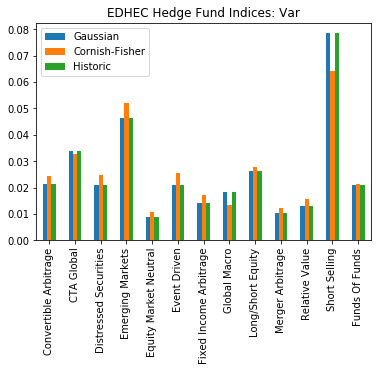

In [23]:
var_list = [eri.var_gaussian(hfi), eri.var_gaussian(hfi, modified=True), eri.var_gaussian(hfi)]
comparison=pd.concat(var_list, axis = 1)
comparison.columns = ["Gaussian","Cornish-Fisher", "Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: Var")

### Beyond VaR aka CVaR

In [24]:
eri.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036693
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038564
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.042207
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64